In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
file_path = 'C:/Users/user/Desktop/Bellabeat_Data/combinedHourlyData.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

           Id             ActivityHour  Calories  TotalIntensity  \
0  8053475328  2016-05-05 04:00:00 UTC        73               0   
1  8053475328  2016-04-17 01:00:00 UTC        73               0   
2  8053475328  2016-05-01 01:00:00 UTC        73               0   
3  8053475328  2016-05-01 04:00:00 UTC        73               0   
4  8053475328  2016-05-09 10:00:00 UTC        73               0   

   AverageIntensity  StepTotal  
0               0.0          0  
1               0.0          0  
2               0.0          0  
3               0.0          0  
4               0.0          0  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   StepTotal         22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ MB
None


In [4]:
# Convert 'ActivityHour' to datetime object
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])

# Convert to display the dates in 'm/d/y H:M:S' format
df['ActivityHour'] = df['ActivityHour'].dt.strftime('%m/%d/%Y %H:%M:%S')

# Convert 'ActivityHour' to datetime object
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])

# Generate summary statistics
summary_statistics = df.describe(include='all')

# To view the summary statistics
print(summary_statistics)

                  Id         ActivityHour      Calories  TotalIntensity  \
count   2.209900e+04                22099  22099.000000    22099.000000   
unique           NaN                  736           NaN             NaN   
top              NaN  2016-04-14 03:00:00           NaN             NaN   
freq             NaN                   33           NaN             NaN   
first            NaN  2016-04-12 00:00:00           NaN             NaN   
last             NaN  2016-05-12 15:00:00           NaN             NaN   
mean    4.848235e+09                  NaN     97.386760       12.035341   
std     2.422500e+09                  NaN     60.702622       21.133110   
min     1.503960e+09                  NaN     42.000000        0.000000   
25%     2.320127e+09                  NaN     63.000000        0.000000   
50%     4.445115e+09                  NaN     83.000000        3.000000   
75%     6.962181e+09                  NaN    108.000000       16.000000   
max     8.877689e+09     

C:\Users\user\AppData\Local\Temp\ipykernel_32092\3626591125.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_statistics = df.describe(include='all')


In [5]:
# Sort the DataFrame by 'Id' and then by 'ActivityHour', both in ascending order
df = df.sort_values(by=['Id', 'ActivityHour'])

# Reset the index of the sorted DataFrame
df = df.reset_index(drop=True)

In [6]:
print(df.head())

           Id        ActivityHour  Calories  TotalIntensity  AverageIntensity  \
0  1503960366 2016-04-12 00:00:00        81              20          0.333333   
1  1503960366 2016-04-12 01:00:00        61               8          0.133333   
2  1503960366 2016-04-12 02:00:00        59               7          0.116667   
3  1503960366 2016-04-12 03:00:00        47               0          0.000000   
4  1503960366 2016-04-12 04:00:00        48               0          0.000000   

   StepTotal  
0        373  
1        160  
2        151  
3          0  
4          0  


In [8]:
# Find unique values in the 'Id' column
unique_ids = df['Id'].unique()

# Count of unique values
num_unique_ids = len(unique_ids)

# Print the number of unique values
print(f"Number of unique IDs: {num_unique_ids}")

# Print each unique value
print("Unique IDs:")
for id in unique_ids:
    print(id)

Number of unique IDs: 33
Unique IDs:
1503960366
1624580081
1644430081
1844505072
1927972279
2022484408
2026352035
2320127002
2347167796
2873212765
3372868164
3977333714
4020332650
4057192912
4319703577
4388161847
4445114986
4558609924
4702921684
5553957443
5577150313
6117666160
6290855005
6775888955
6962181067
7007744171
7086361926
8053475328
8253242879
8378563200
8583815059
8792009665
8877689391


In [9]:
# Group by 'Id'
grouped = df.groupby('Id')

# Calculate the required statistics for each group
id_stats = grouped['ActivityHour'].agg(['count', 'min', 'max'])

# Rename the columns for clarity
id_stats = id_stats.rename(columns={'count': 'Number of Hours', 'min': 'Earliest Hour', 'max': 'Latest Hour'})

# Print the results for each unique ID
for id, stats in id_stats.iterrows():
    print(f"ID: {id}")
    print(f"Number of Hours: {stats['Number of Hours']}")
    print(f"Earliest Hour: {stats['Earliest Hour']}")
    print(f"Latest Hour: {stats['Latest Hour']}\n")

ID: 1503960366
Number of Hours: 717
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-11 20:00:00

ID: 1624580081
Number of Hours: 736
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 15:00:00

ID: 1644430081
Number of Hours: 708
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-11 11:00:00

ID: 1844505072
Number of Hours: 731
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 10:00:00

ID: 1927972279
Number of Hours: 736
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 15:00:00

ID: 2022484408
Number of Hours: 736
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 15:00:00

ID: 2026352035
Number of Hours: 736
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 15:00:00

ID: 2320127002
Number of Hours: 735
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-05-12 14:00:00

ID: 2347167796
Number of Hours: 414
Earliest Hour: 2016-04-12 00:00:00
Latest Hour: 2016-04-29 05:00:00

ID: 2873212765
Number of Hours: 736
Earliest Hour: 2016

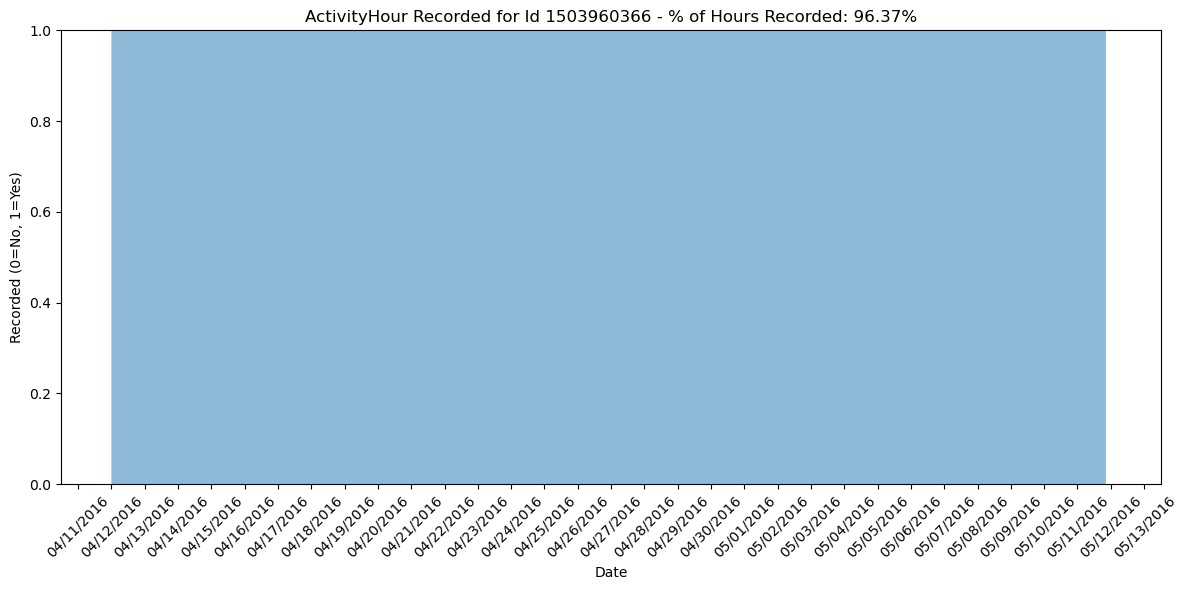

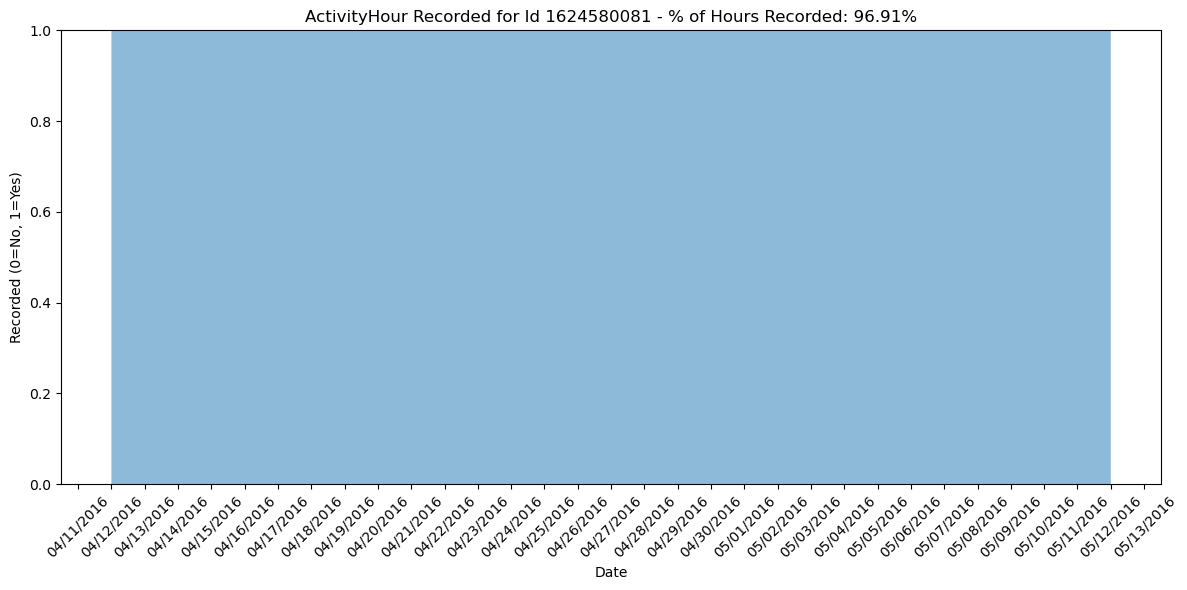

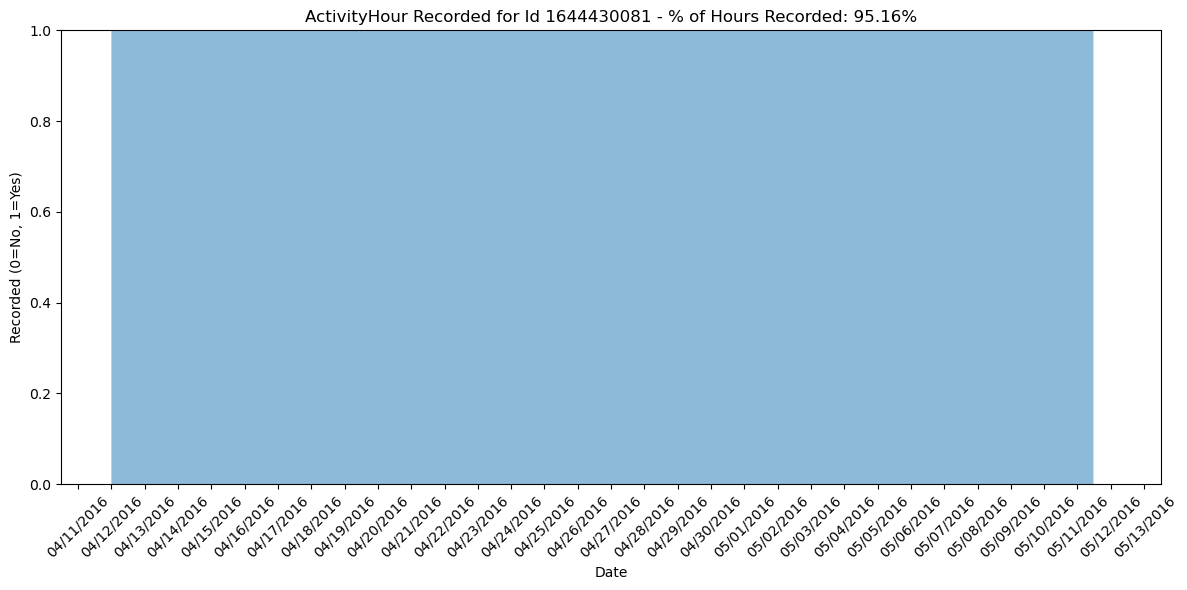

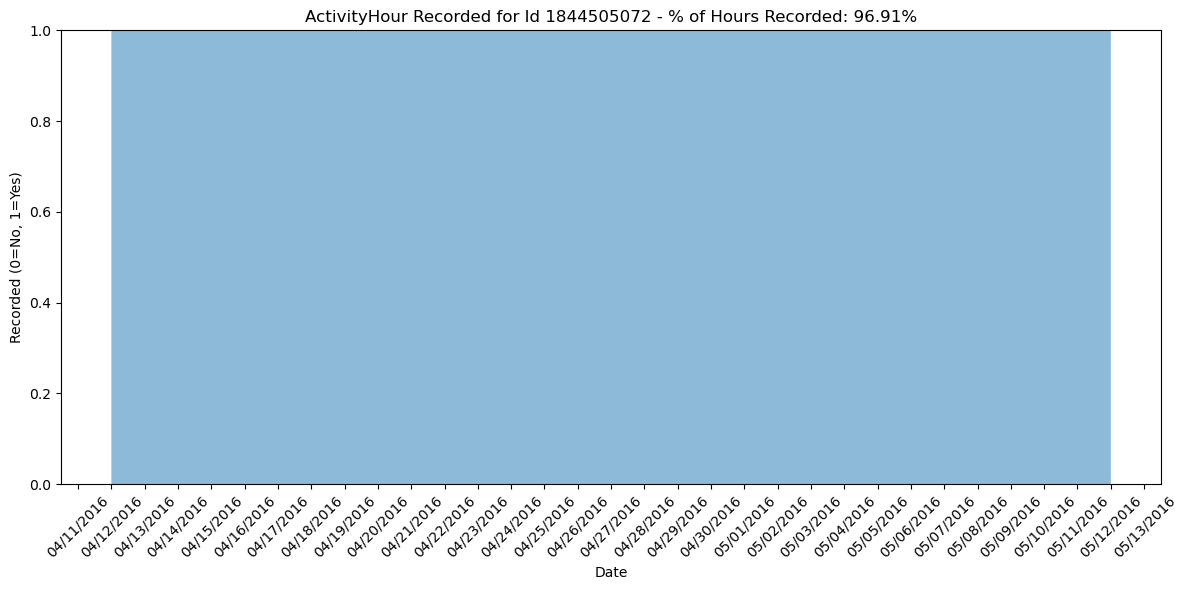

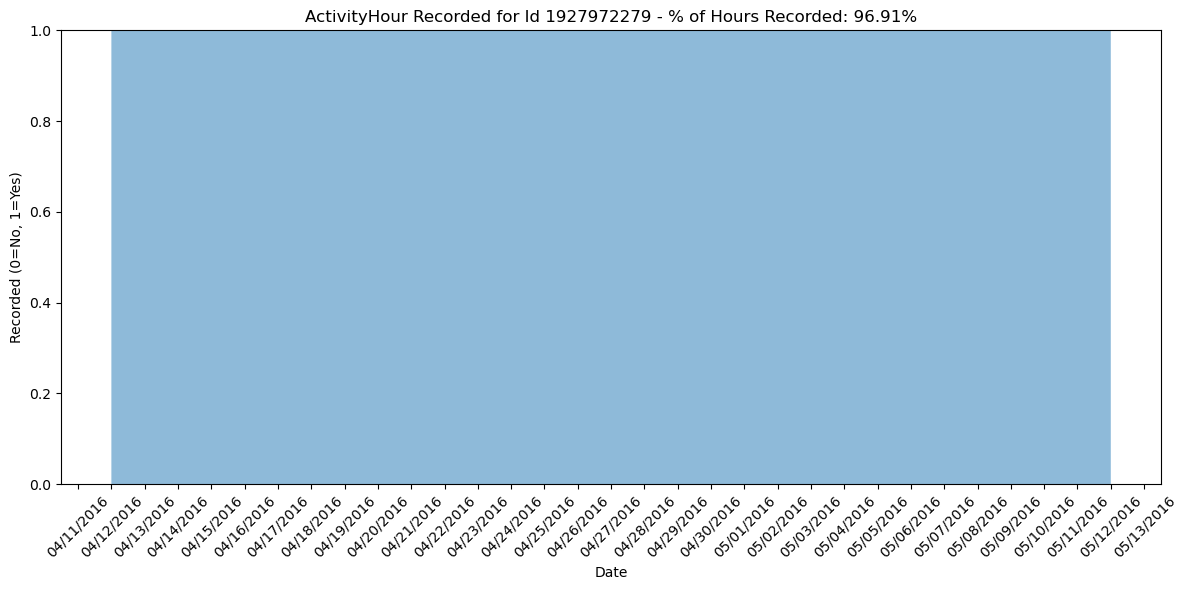

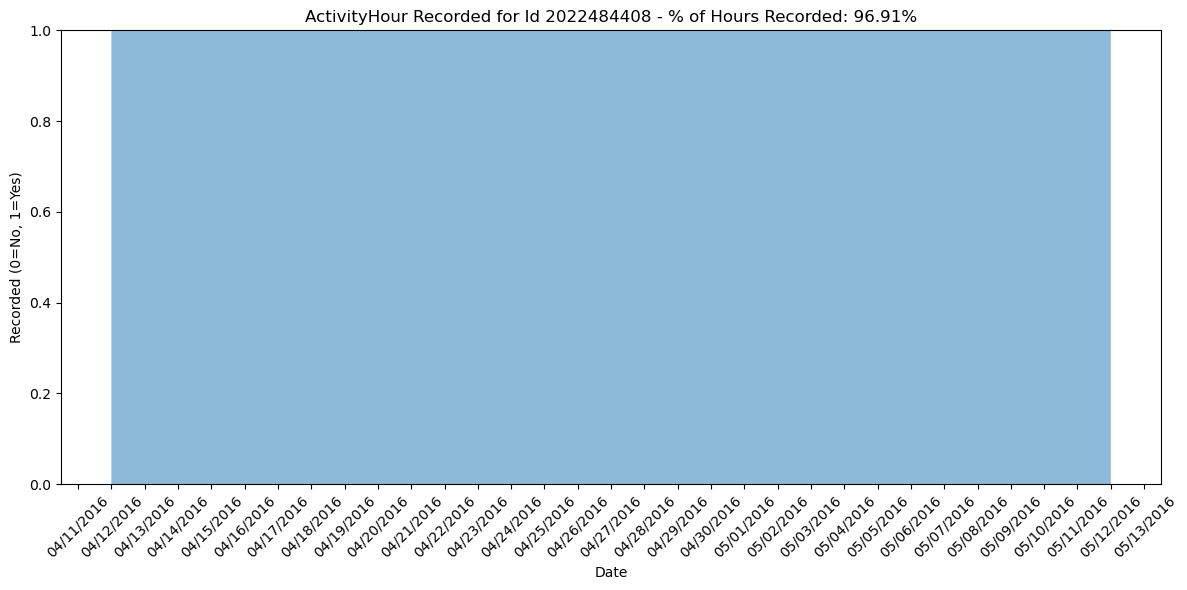

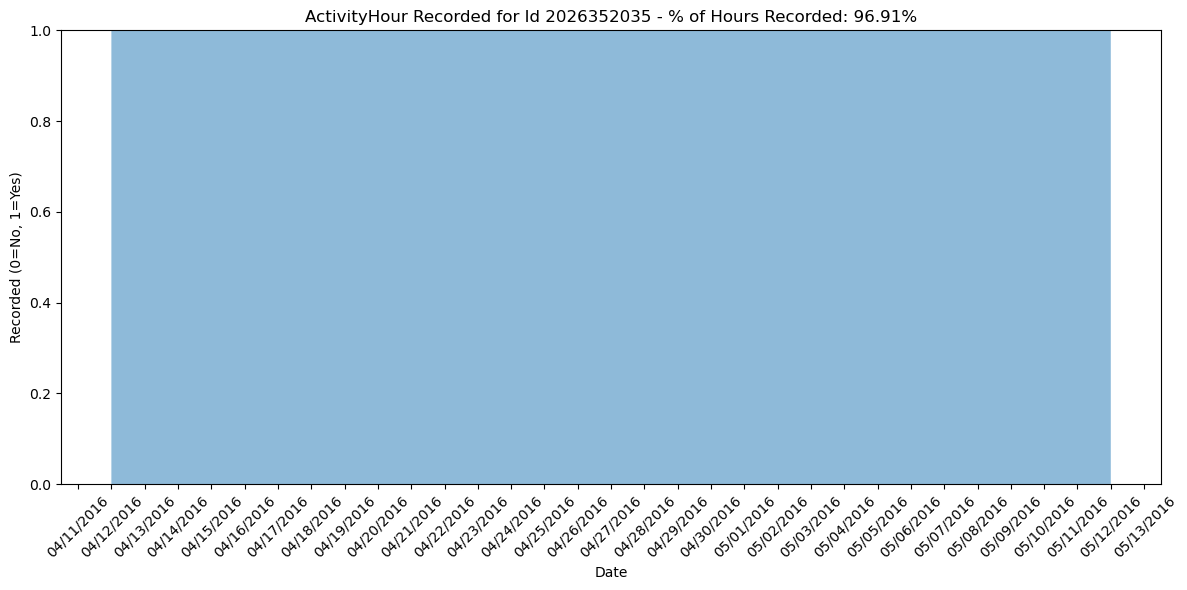

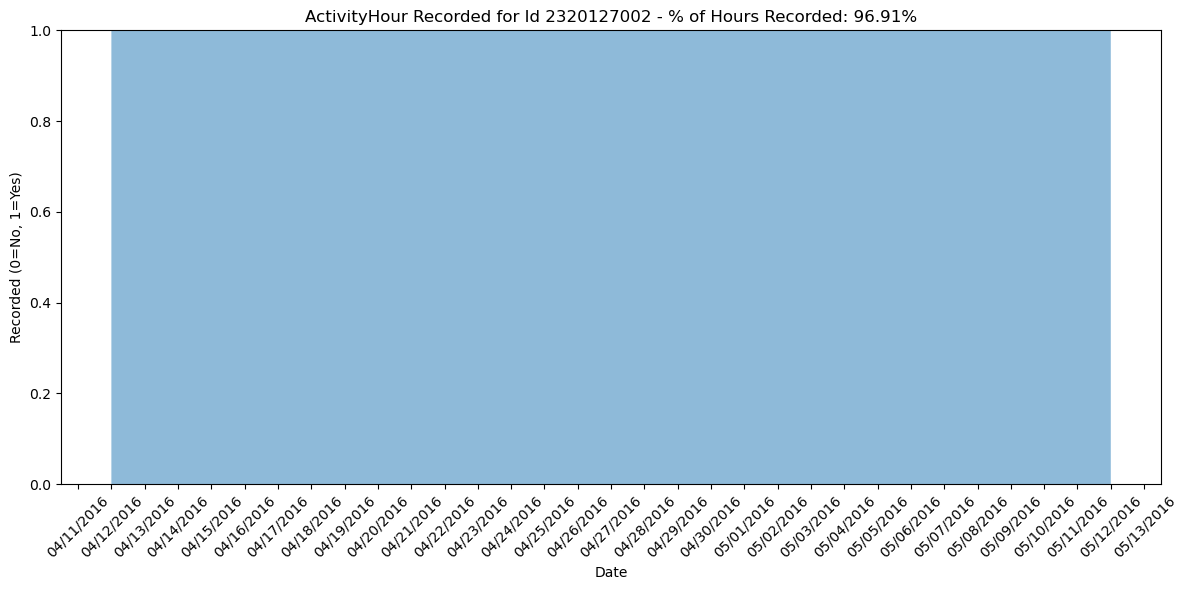

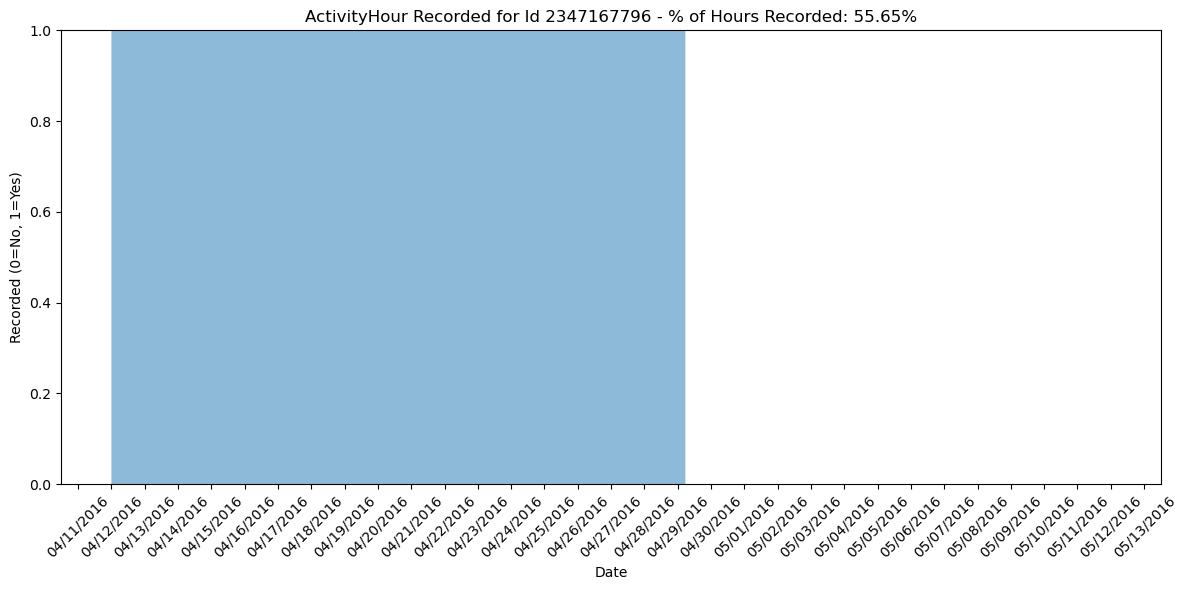

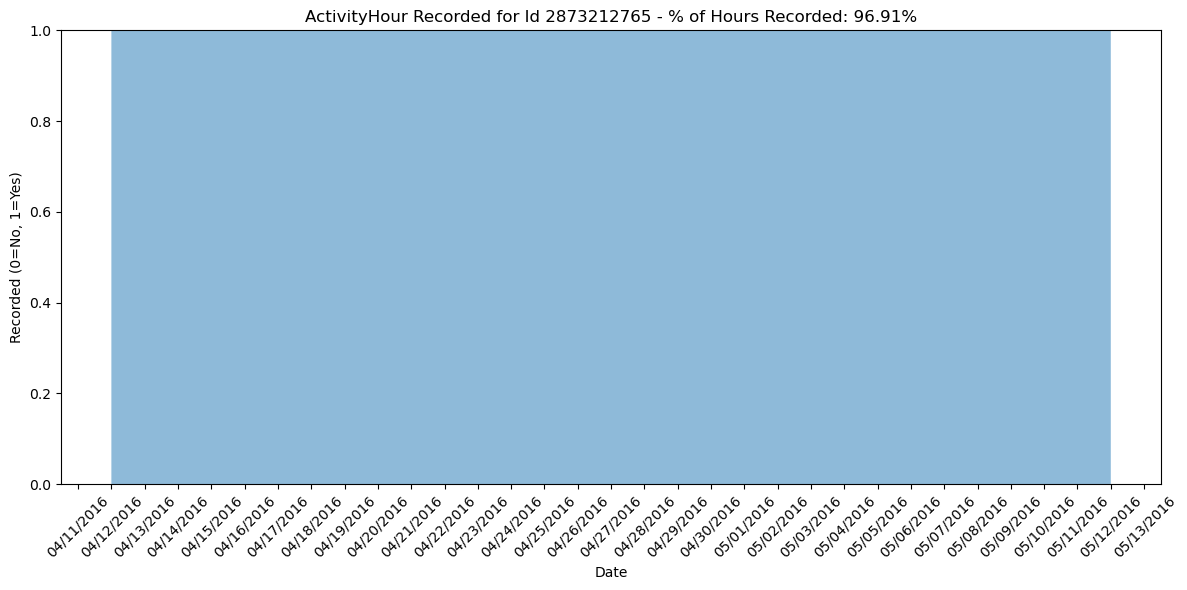

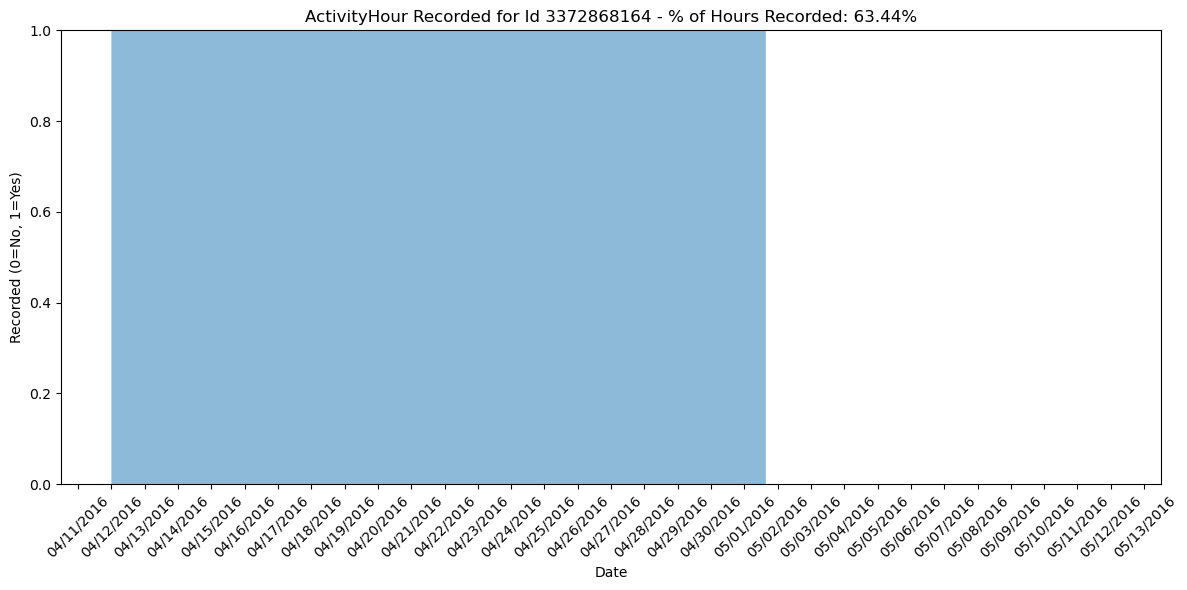

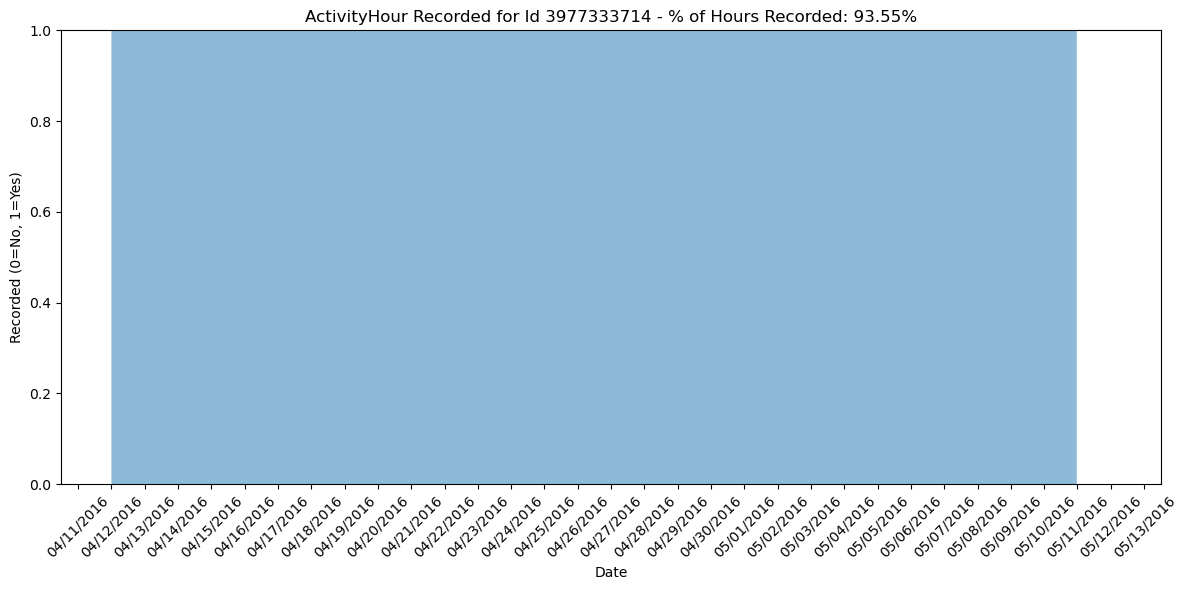

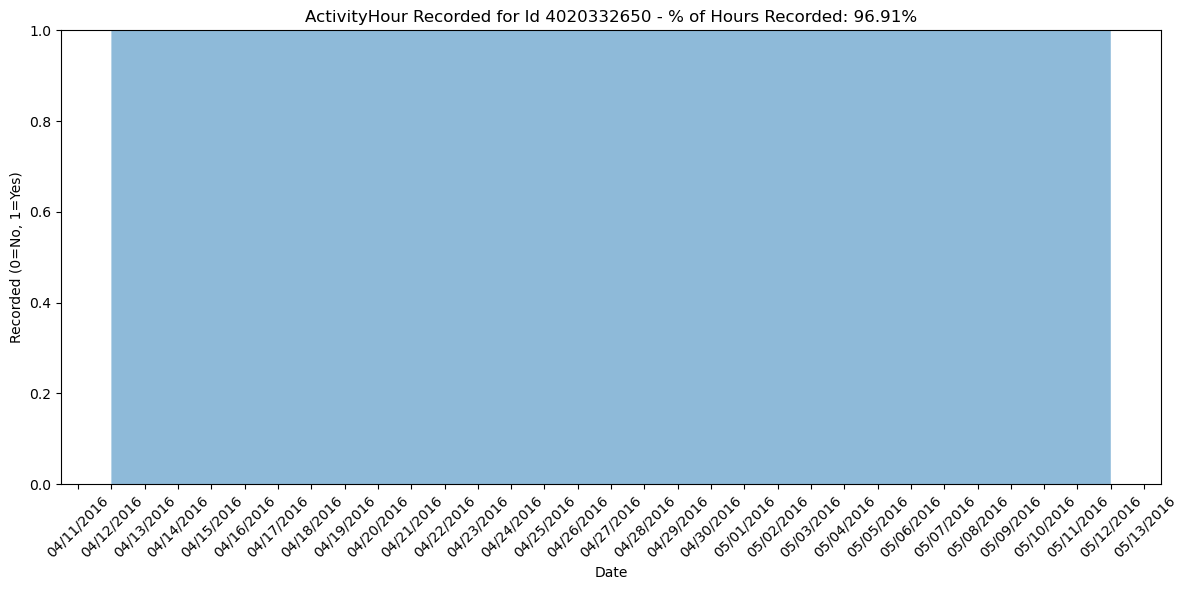

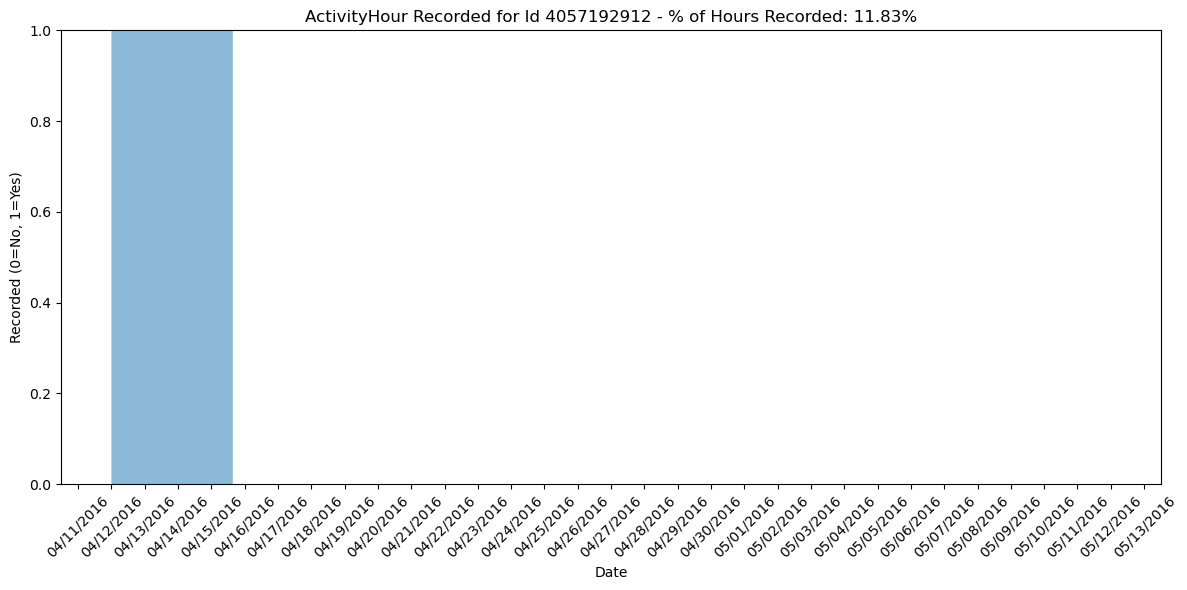

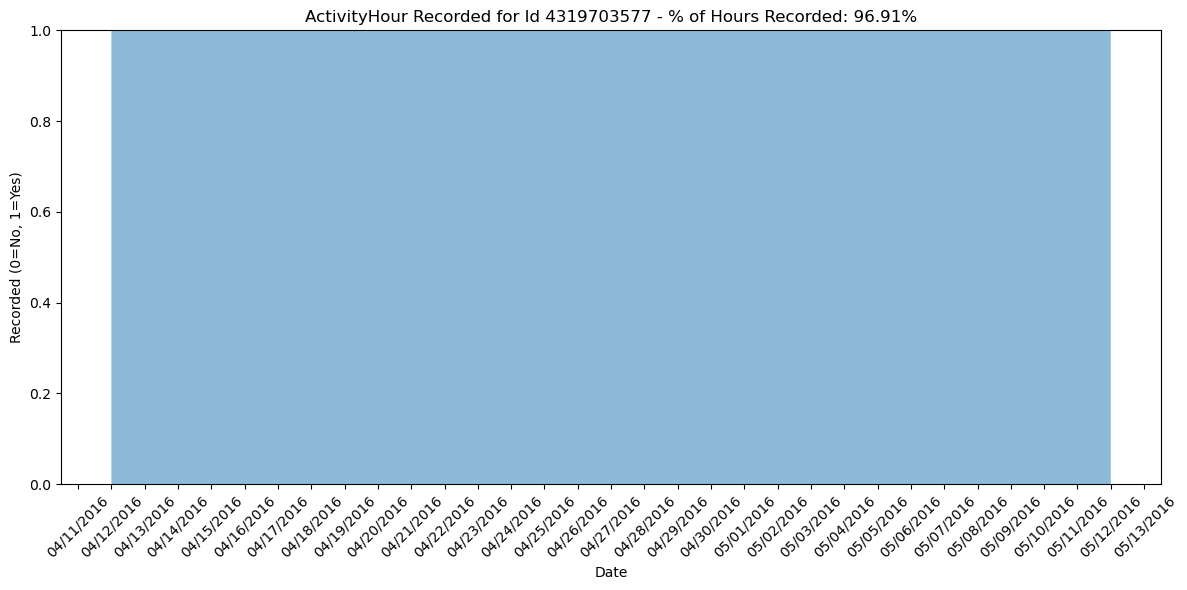

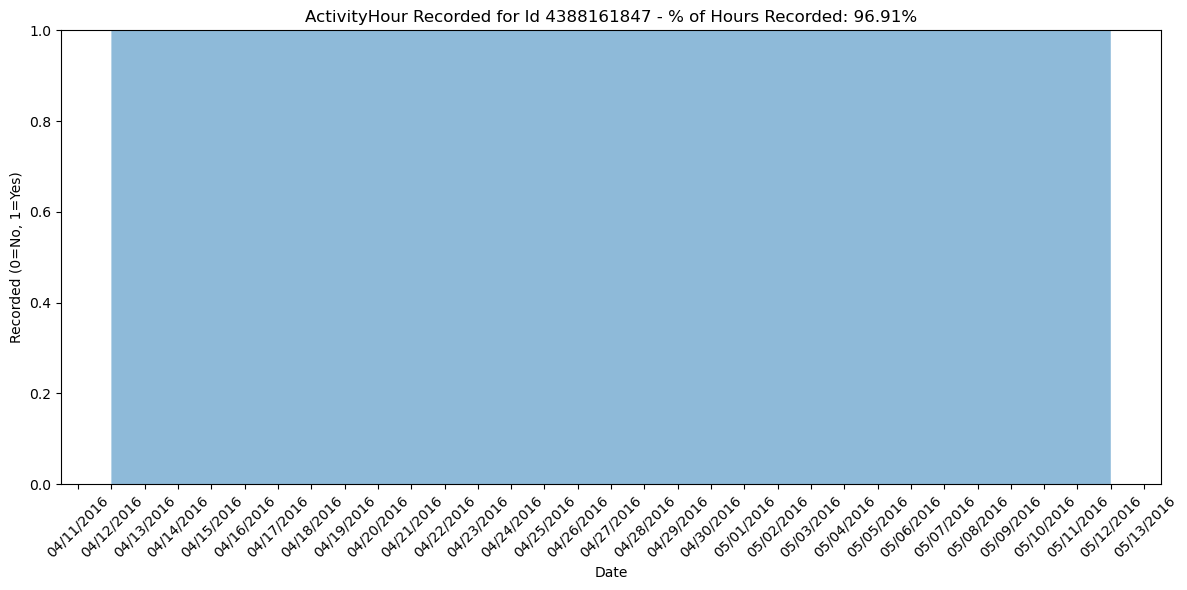

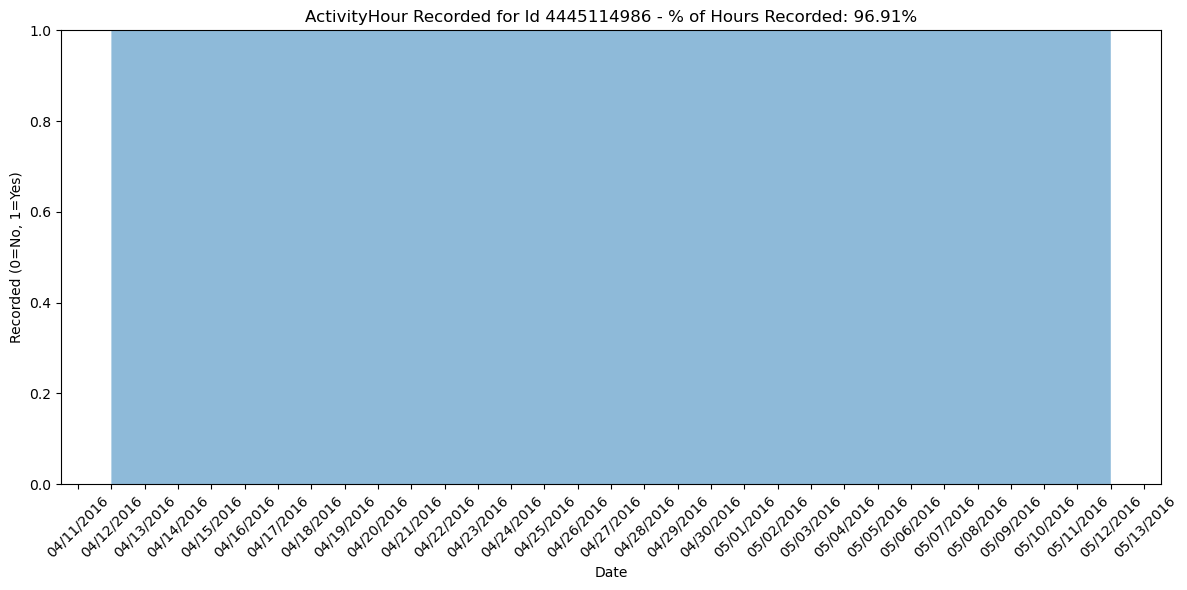

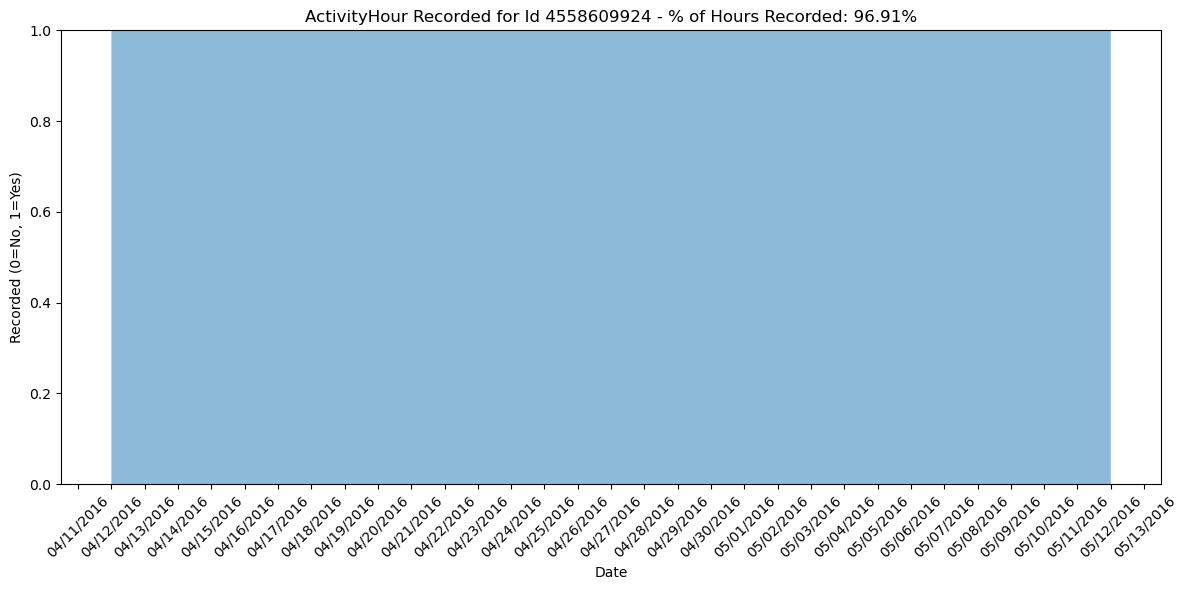

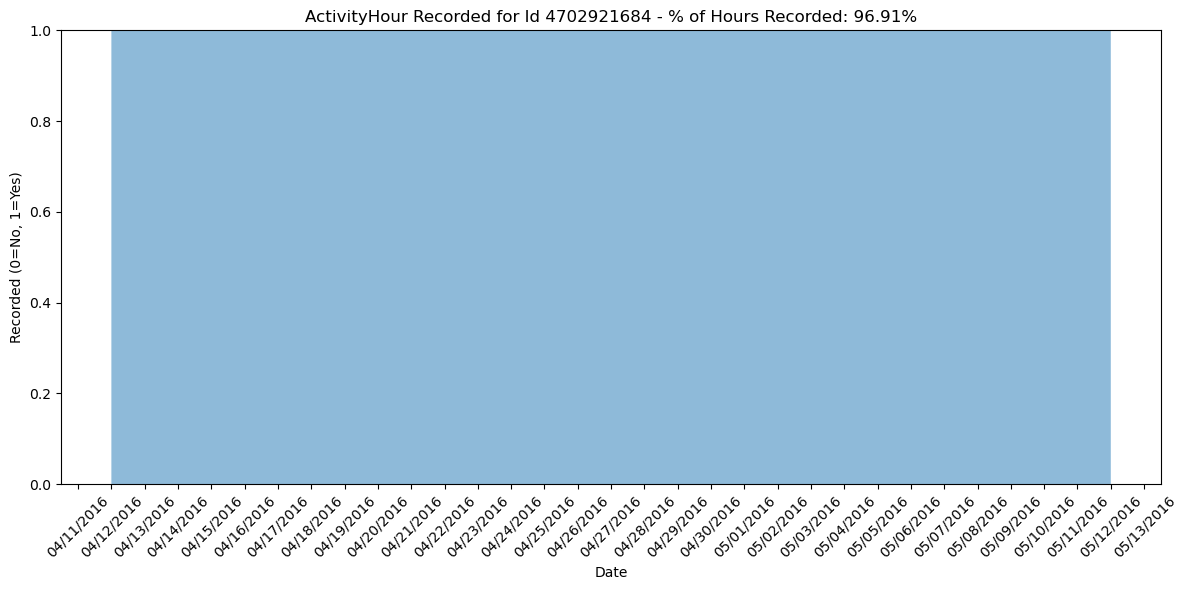

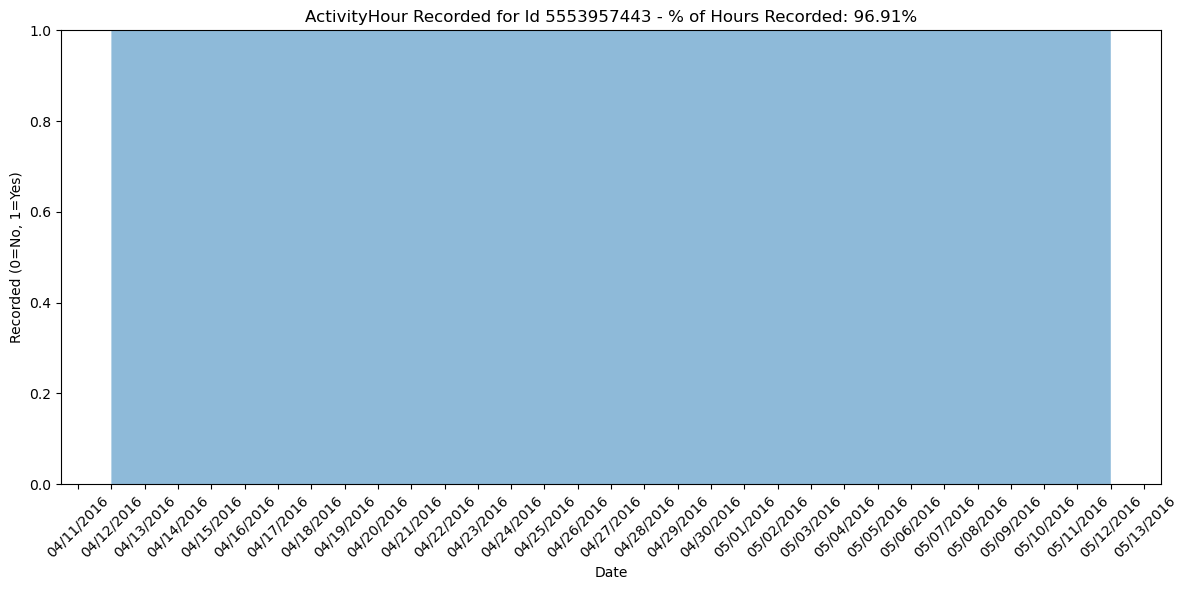

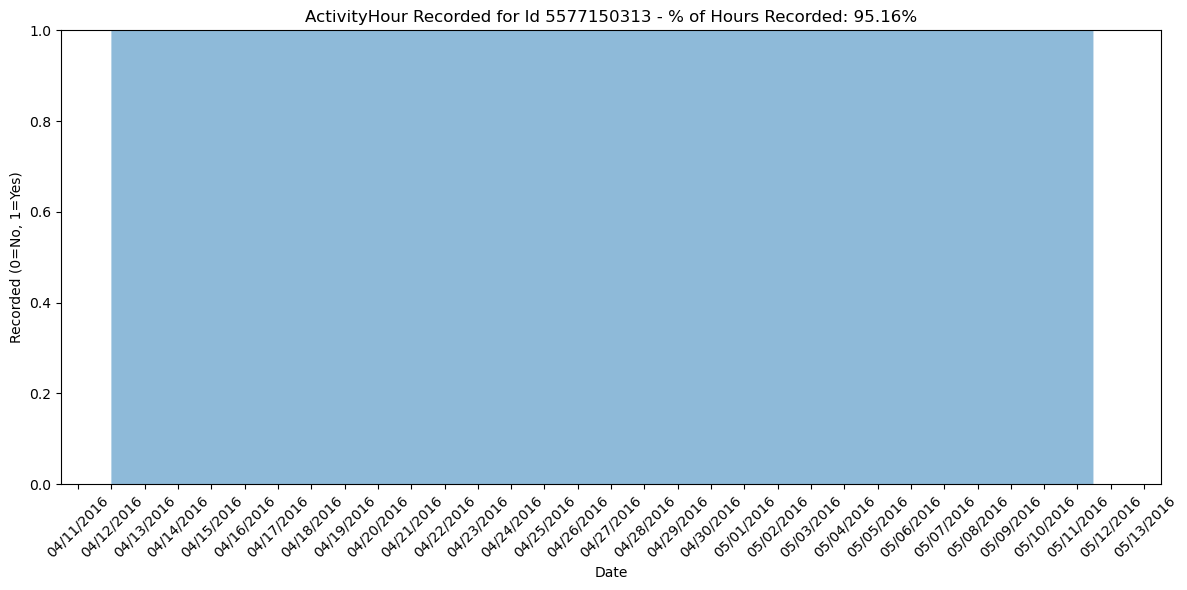

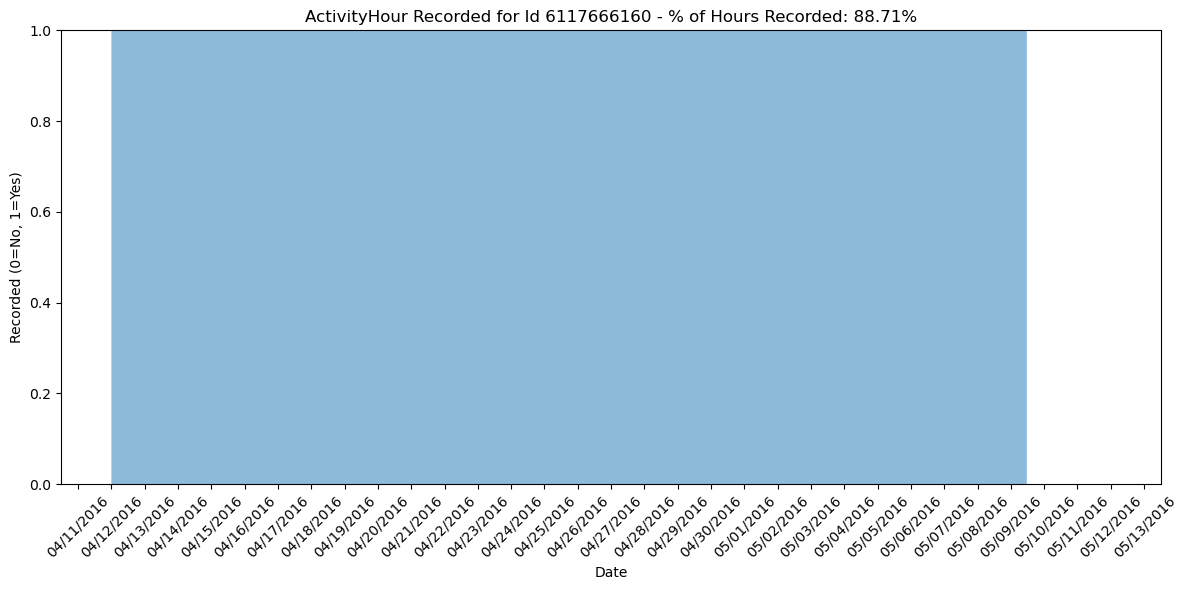

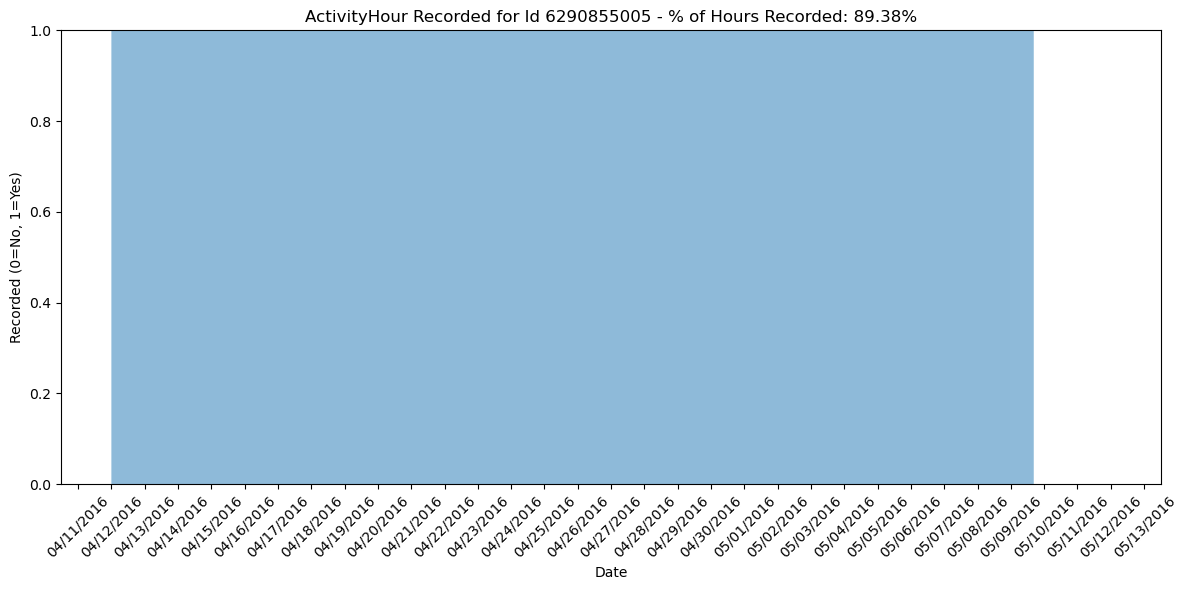

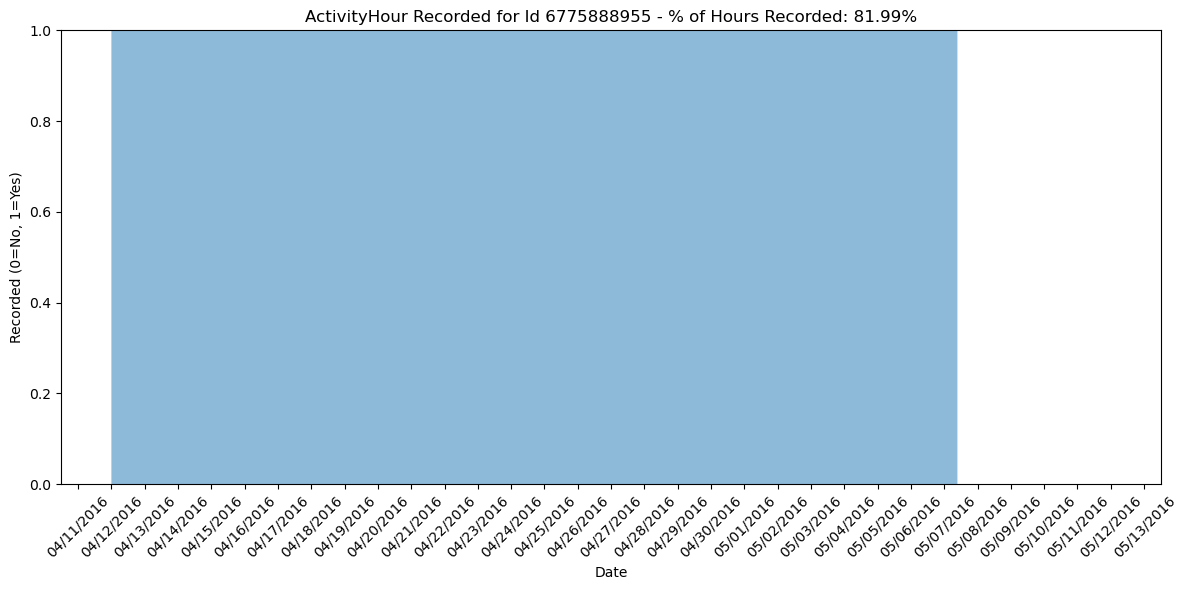

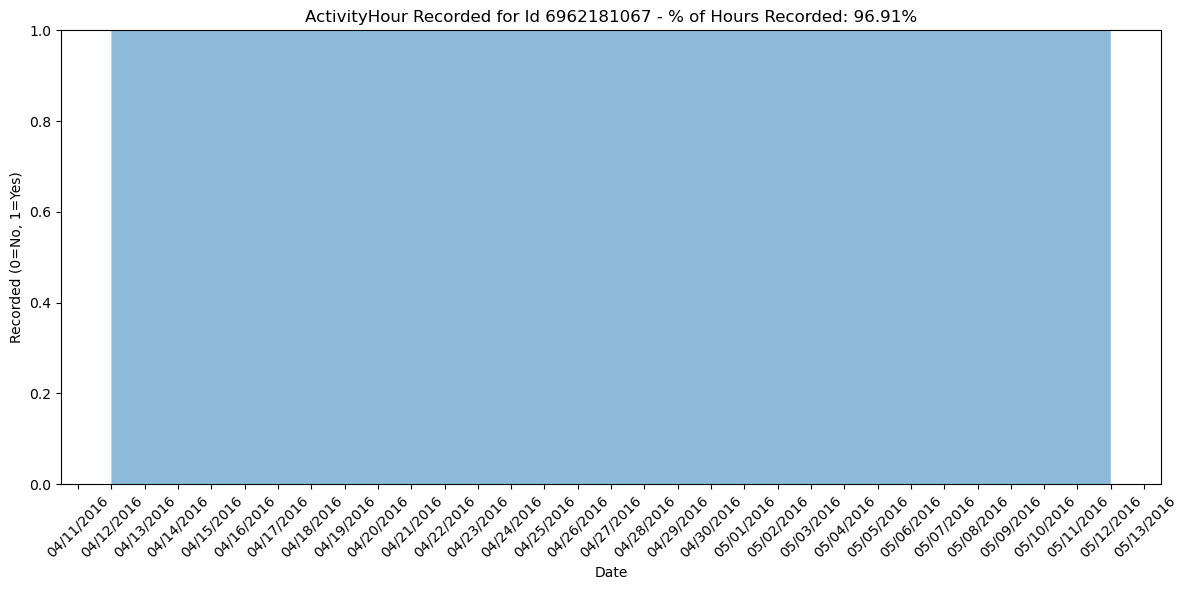

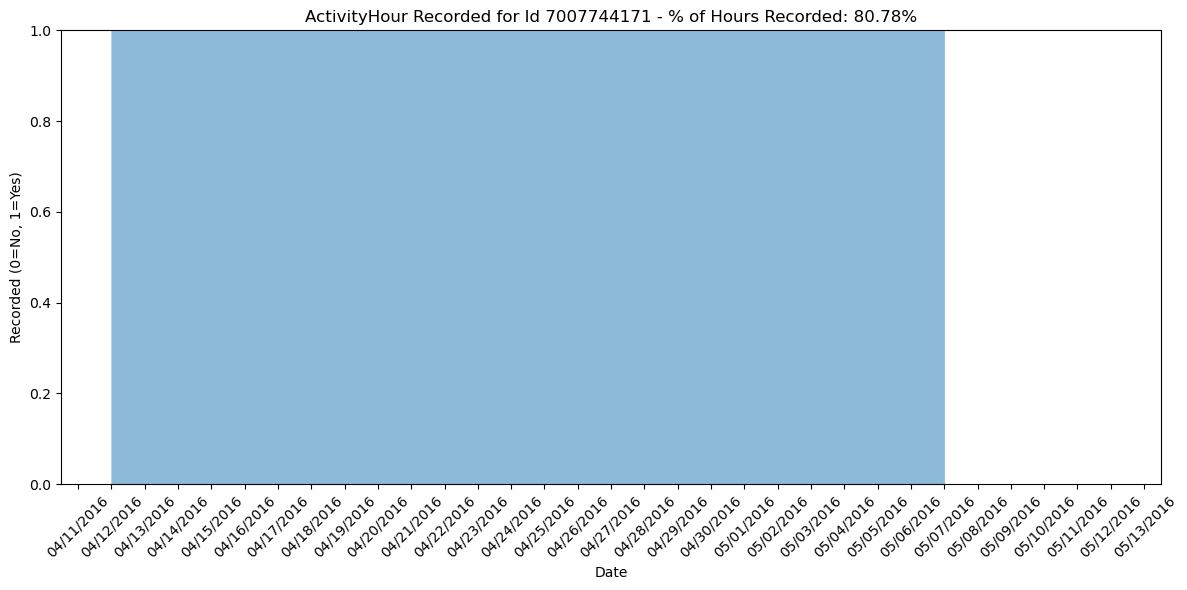

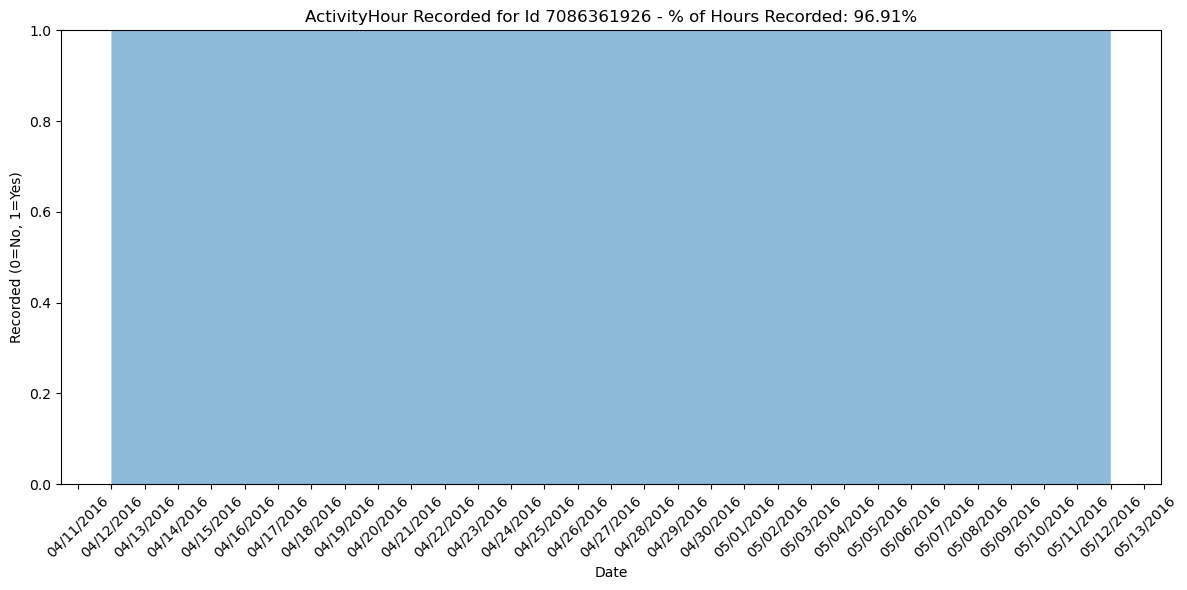

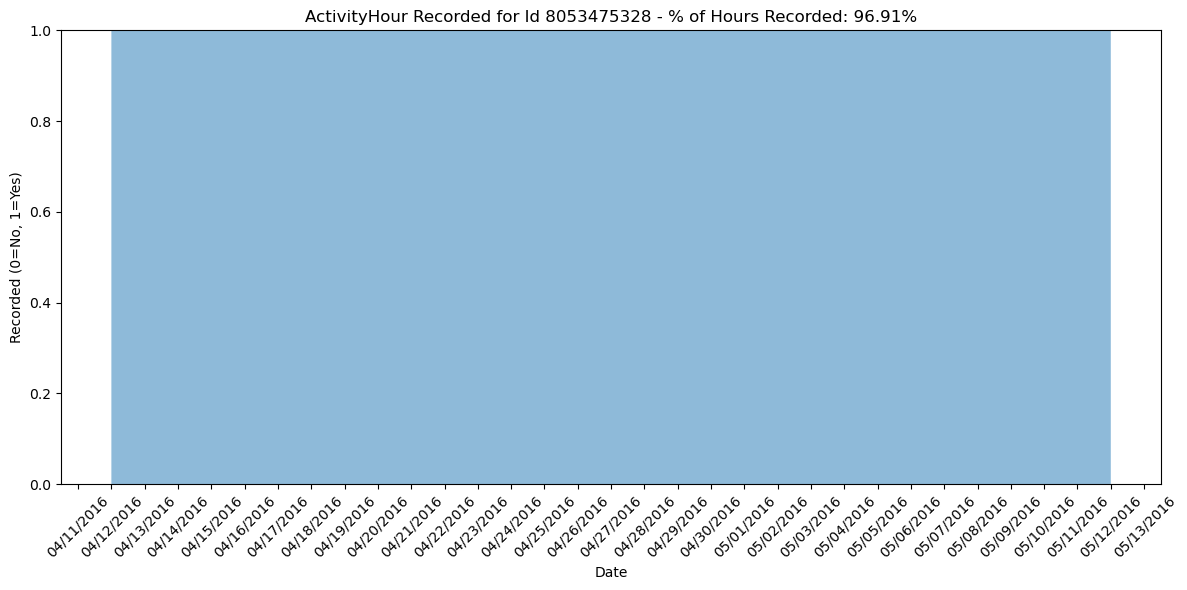

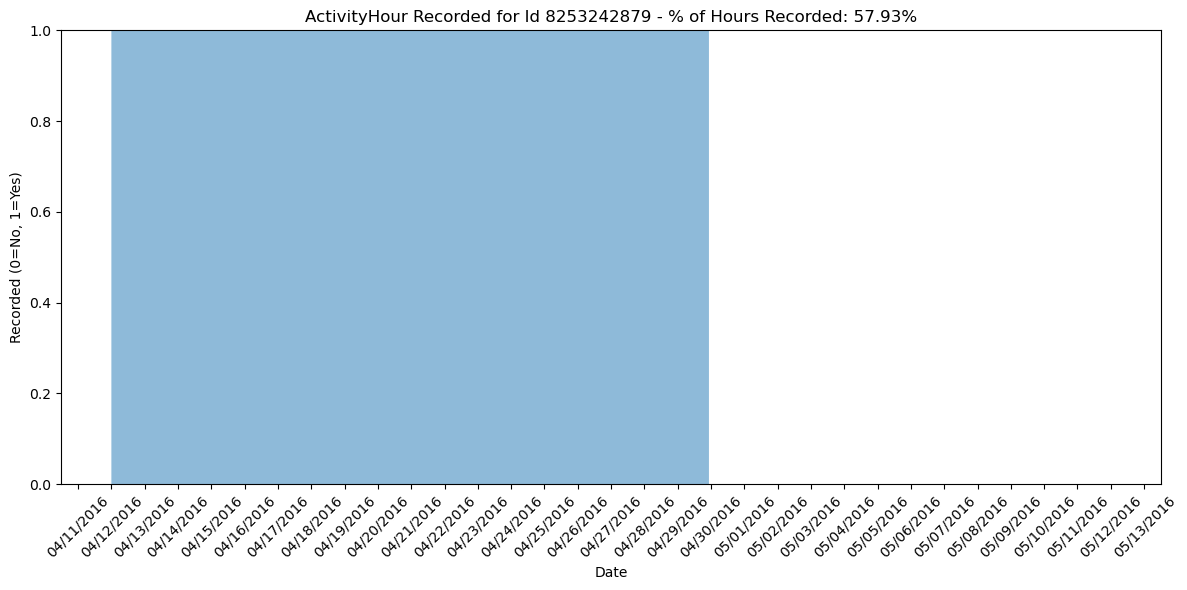

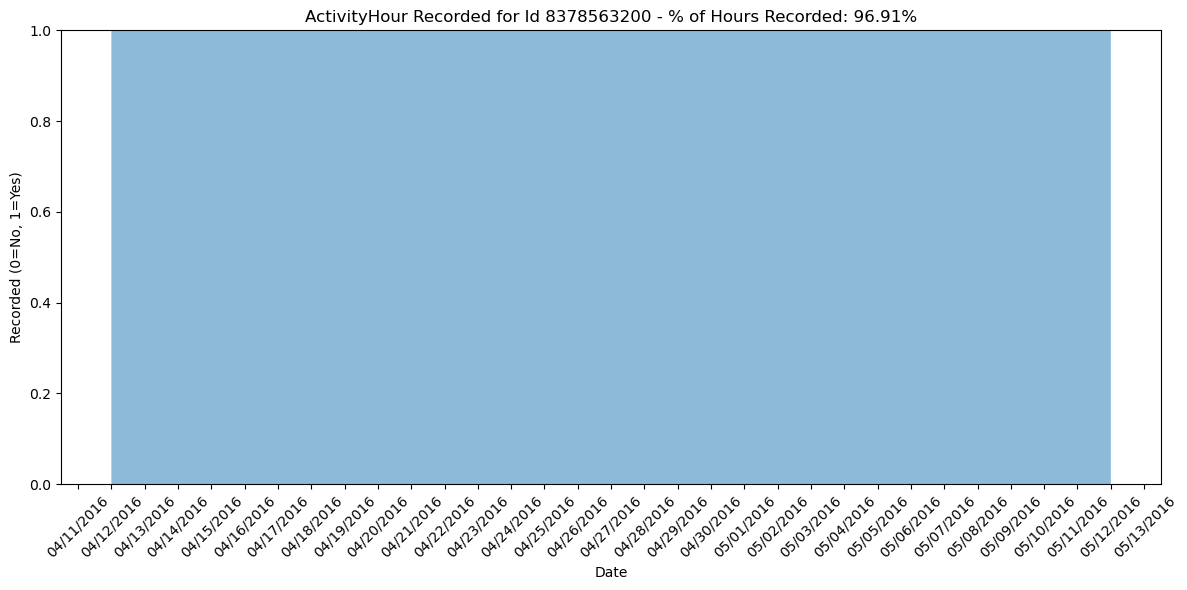

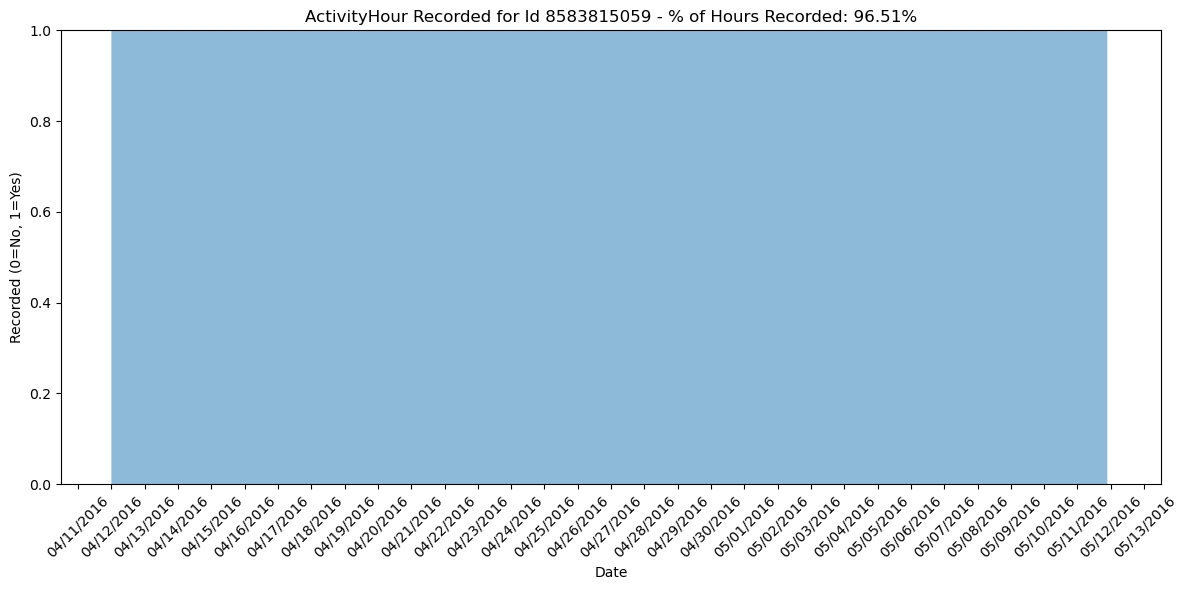

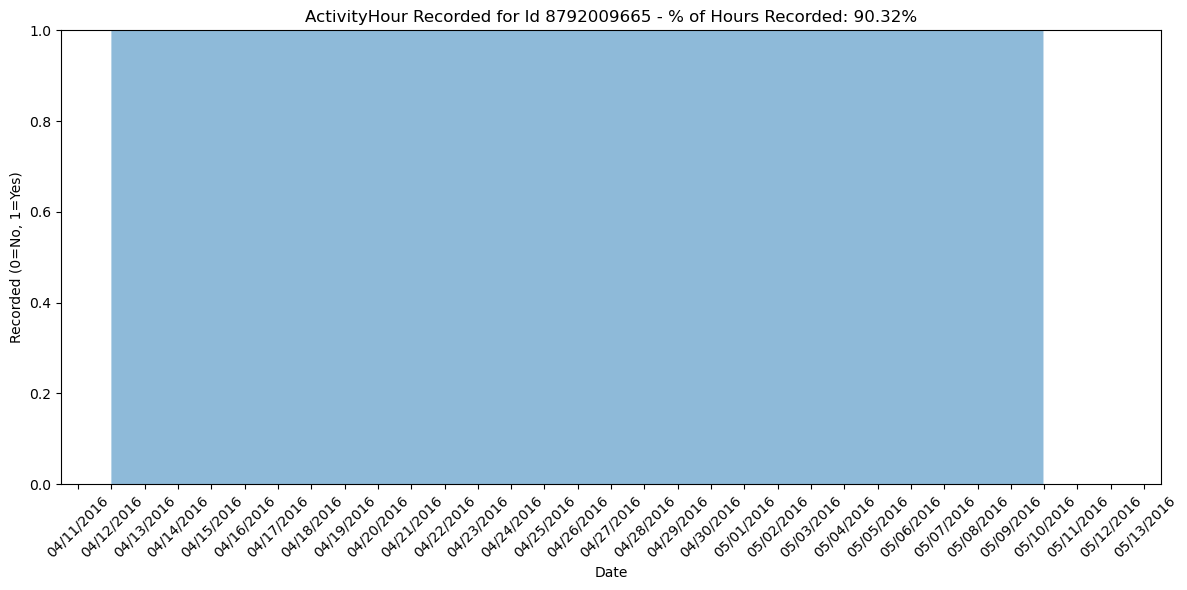

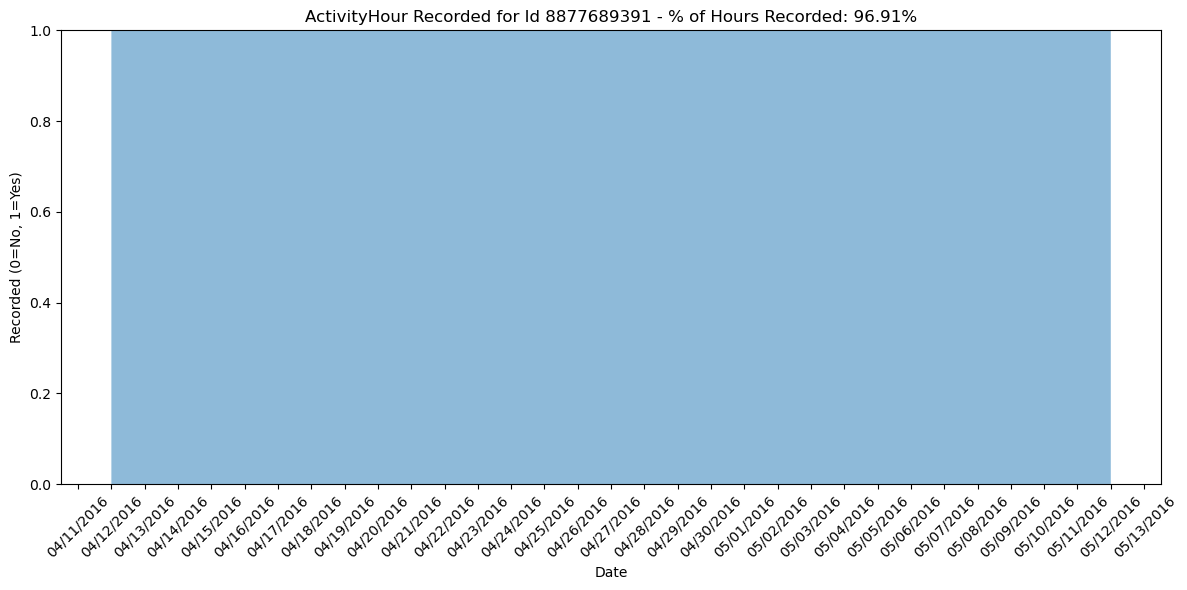

In [14]:
# Define the function to plot for each Id
def plot_activity_for_id(df, id):
    # Filter for the specific Id
    df_id = df[df['Id'] == id]

    # Filter for the date range
    start_date = pd.to_datetime('04/12/2016', format='%m/%d/%Y')
    end_date = pd.to_datetime('05/12/2016', format='%m/%d/%Y')
    df_id = df_id[(df_id['ActivityHour'] >= start_date) & (df_id['ActivityHour'] <= end_date)]

    # Create a complete DataFrame for the date range
    all_dates = pd.date_range(start=start_date, end=end_date, freq='H')
    df_full = pd.DataFrame({'ActivityHour': all_dates})
    df_full = df_full.set_index('ActivityHour')
    df_full['Recorded'] = 0  # Default to not recorded
    df_full.loc[df_full.index.intersection(df_id['ActivityHour']), 'Recorded'] = 1  # Mark recorded times

    # Calculate the percentage of hours recorded
    percentage_recorded = df_full['Recorded'].sum() / 744 * 100

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.fill_between(df_full.index, df_full['Recorded'], step='mid', alpha=0.5)
    plt.title(f'ActivityHour Recorded for Id {id} - % of Hours Recorded: {percentage_recorded:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Recorded (0=No, 1=Yes)')
    plt.ylim(0, 1)

    # Improve the readability of x-axis labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

# Iterate over each unique Id and plot
for id in df['Id'].unique():
    plot_activity_for_id(df, id)

These graphs indicate that recording was continuous until something caused a break. Some things that could do so are end of sample period for participants based on their time zone (times are UTC), deciding to end early. Interestingly, there was no instance of any participant resuming fitbit use to record their activity after their first stop. Data will be investigated closer to see if readings of calories (always above 0) support the conclusions drawn from this visualization of the data.

In [16]:
# Filter and print rows where Calories <= 0
rows_with_calories_leq_zero = df[df['Calories'] <= 0]

# Print the resulting rows
print(rows_with_calories_leq_zero)

Empty DataFrame
Columns: [Id, ActivityHour, Calories, TotalIntensity, AverageIntensity, StepTotal]
Index: []


In [19]:
# Total count of ActivityHour entries
total_activity_hours = len(df)

# Number of unique Ids
unique_ids_count = df['Id'].nunique()

# Total days in the sample period
start_date = pd.to_datetime('04/12/2016', format='%m/%d/%Y')
end_date = pd.to_datetime('05/12/2016', format='%m/%d/%Y')
total_days = (end_date - start_date).days + 1

# Calculate the average percentage of time recorded
average_percentage_recorded = (total_activity_hours / (unique_ids_count * total_days)) / 24 * 100

# Print the result
print(f"Average percentage of time recorded during sample period: {average_percentage_recorded:.2f}%")

Average percentage of time recorded during sample period: 90.01%


C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


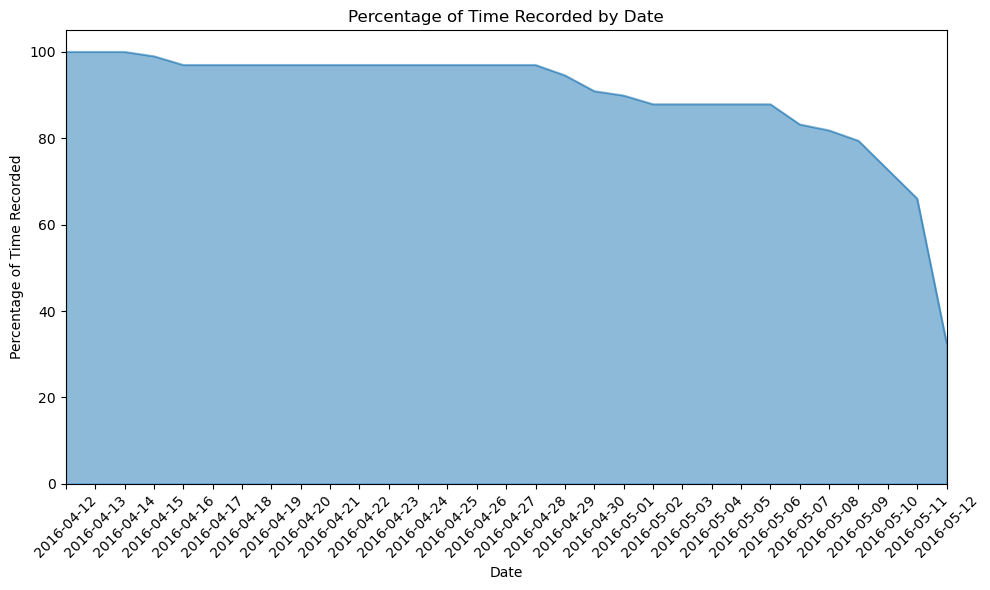

In [22]:
# Convert 'ActivityHour' to datetime and extract the date
df['Date'] = pd.to_datetime(df['ActivityHour']).dt.date

# Filter the DataFrame for the sample period
start_date = pd.to_datetime('2016-04-12')
end_date = pd.to_datetime('2016-05-12')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group by date and count the number of entries
daily_counts = df.groupby('Date').size()

# Calculate the percentage of time recorded
max_hours_per_day = 792  # 24 hours * 33 participants
daily_percentage = (daily_counts / max_hours_per_day) * 100

# Plot
plt.figure(figsize=(10, 6))
daily_percentage.plot(kind='area', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Percentage of Time Recorded')
plt.title('Percentage of Time Recorded by Date')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)

# Set the x-axis limits to the sample period
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()